# Code for Linear Regression

## Importing Data

In [1]:
import csv, pandas as pd, numpy as np
csvfile = open('aapl.csv', newline='')
workbook = csv.reader(csvfile, delimiter=' ', quotechar='|')
print(workbook)

In [2]:
dates = []
opening_price = []
high_price = []
low_price = []
closing_price = []
volume = []
for row in workbook:
    try:
        array_row = row[0].split(',')
        try:
            float(array_row[1])
            float(array_row[2])
            float(array_row[3])
            float(array_row[4])
            float(array_row[5])
        except:
            print('Invalid Data: ', array_row)
            continue
        dates.append(array_row[0])
        opening_price.append(float(array_row[1]))
        high_price.append(float(array_row[2]))
        low_price.append(float(array_row[3]))
        closing_price.append(float(array_row[4]))
        volume.append(float(array_row[5]))
    except: 
        print(row)

features = {'opening_price':opening_price, 'high_price':high_price, 'low_price':low_price, 'volume':volume}
m = len(dates)
y = {'closing_price' : closing_price}

Invalid Data:  ['\ufeffDate', 'Open', 'High', 'Low', 'Close', 'Volume']


## Get X,Y DataFrames 

In [3]:
df_x = pd.DataFrame(features)
print(df_x[:10])

   high_price  low_price  opening_price      volume
0      167.54     162.88         163.04  40644933.0
1      164.75     161.65         161.95  32549163.0
2      163.89     157.51         158.50  60819539.0
3      157.89     150.24         157.07  70672608.0
4      161.00     155.03         160.29  54390516.0
5      163.40     159.07         163.08  51608580.0
6      163.72     154.00         154.83  68243838.0
7      163.88     156.00         159.10  72738522.0
8      166.80     160.10         166.00  86593825.0
9      168.62     166.76         167.16  47230787.0


In [4]:
df_y = pd.DataFrame(y)
print(df_y[:10])

   closing_price
0         167.37
1         164.34
2         162.71
3         156.41
4         155.15
5         159.54
6         163.03
7         156.49
8         160.50
9         167.78


In [5]:
df_x.describe()

,high_price,low_price,opening_price,volume
count,4000.000000,4000.000000,4000.000000,4.000000e+03
mean,51.318470,50.345553,50.852702,1.261720e+08
std,48.254563,47.536884,47.903902,1.000376e+08
min,0.940000,0.910000,0.930000,9.515800e+06
25%,9.557500,9.227500,9.397500,5.484920e+07
50%,31.415000,30.560000,30.950000,9.834802e+07
75%,89.247500,87.375000,88.412500,1.684245e+08
max,180.100000,178.250000,179.370000,8.432640e+08


In [6]:
df_y.describe()

,closing_price
count,4000.000000
mean,50.846305
std,47.909996
min,0.940000
25%,9.377500
50%,31.290000
75%,88.422500
max,179.260000


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

/Users/priyanshubhatnagar/Documents/GitHub/Stock-Price-Prediction/env/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Split Training Data and Test Data

In [8]:
reg = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2,random_state=4)

In [9]:
reg.fit(x_train, y_train)

/Users/priyanshubhatnagar/Documents/GitHub/Stock-Price-Prediction/env/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Coefficients and Linear Regression

In [10]:
reg.coef_

array([[ 8.19691377e-01,  7.76935402e-01, -5.96481472e-01,
         1.18056278e-10]])

In [11]:
y_predicted = reg.predict(x_test)
print(y_predicted[:5])

[[  6.34545474]
 [ 27.1436515 ]
 [174.15497626]
 [ 37.57302691]
 [102.72332804]]


## Plots

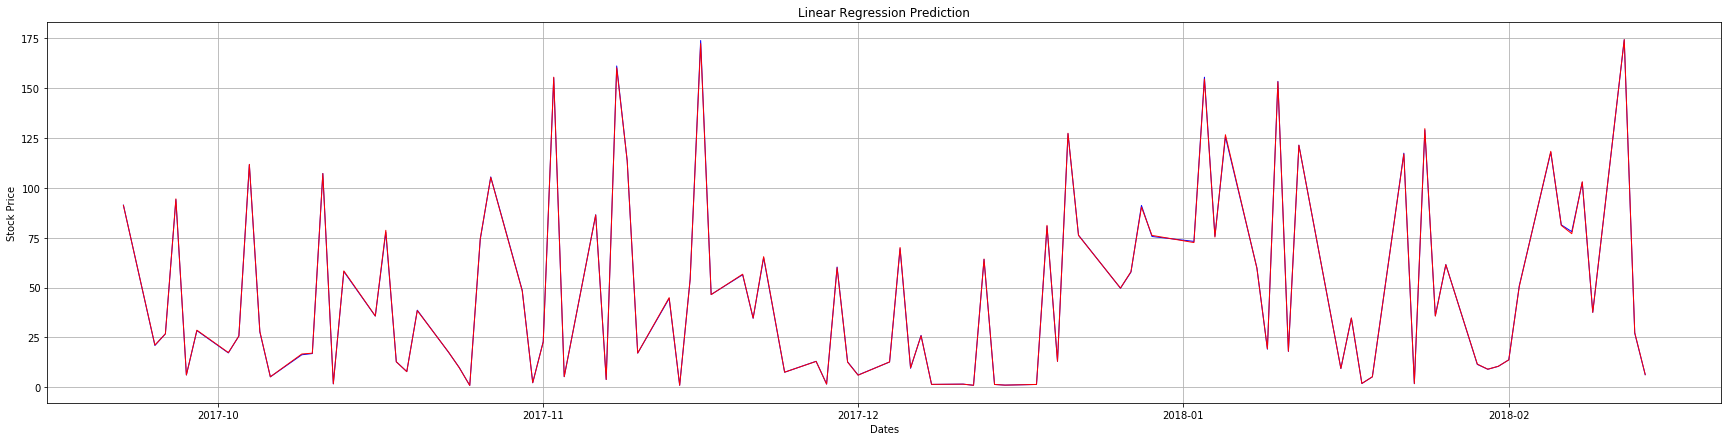

In [16]:
import matplotlib.pyplot as plt
from datetime import date
new_dates = []
for x in dates:
    series = x.split('-')
    if 'Jan' == series[1]:
        series[1] = 1
    elif 'Feb' == series[1]:
        series[1] = 2
    elif 'Mar' == series[1]:
        series[1] = 3
    elif 'Apr' == series[1]:
        series[1] = 4
    elif 'May' == series[1]:
        series[1] = 5
    elif 'Jun' == series[1]:
        series[1] = 6
    elif 'Jul' == series[1]:
        series[1] = 7
    elif 'Aug' == series[1]:
        series[1] = 8
    elif 'Sep' == series[1]:
        series[1] = 9
    elif 'Oct' == series[1]:
        series[1] = 10
    elif 'Nov' == series[1]:
        series[1] = 11
    elif 'Dec' == series[1]:
        series[1] = 12
    else:
        print(series[1], 'Left')
        continue
    try:
        new_dates.append(date(year=int(series[2]) + 2000, month=series[1],day=int(series[0])))
    except:
        print(series)
    
        
plt.figure(figsize=(30,7))
plt.plot(new_dates[:100:1],y_predicted[:100:1], color='blue', linewidth=1, label='Predicted')
plt.plot(new_dates[:100:1], y_test['closing_price'][:100:1], color='red', linewidth=1, label='Actual')

plt.title('Linear Regression Prediction')
plt.ylabel('Stock Price')
plt.xlabel('Dates')
plt.grid(True)
plt.show()

## Actual Value

In [18]:
for x,y1 in zip(dates[:5:1], y_test['closing_price'][:5:1]):    
    print('Date: ',x, 'Closing Price: ', y1)

Date:  14-Feb-18 Closing Price:  6.36
Date:  13-Feb-18 Closing Price:  27.4
Date:  12-Feb-18 Closing Price:  174.22
Date:  9-Feb-18 Closing Price:  37.56
Date:  8-Feb-18 Closing Price:  103.01


## Predicted Value

In [19]:
for x,y1 in zip(dates[:5:-1], y_predicted[:5:1]):
    print('Date: ',x, 'Closing Price: ', y1[0])

Date:  27-Mar-02 Closing Price:  6.345454738865259
Date:  28-Mar-02 Closing Price:  27.143651504085295
Date:  1-Apr-02 Closing Price:  174.15497626431937
Date:  2-Apr-02 Closing Price:  37.57302691138312
Date:  3-Apr-02 Closing Price:  102.7233280405992


In [20]:
new_y_test = []
# print(y_test)
for y1 in y_test:
    try:
        new_y_test.append(float(y1[0]))
    except:
        #print(y[0])
        continue

# print(type(new_y_test), new_y_test[:10])

In [21]:
new_y_predicted = []

# print(y_predicted)
for y1 in y_predicted:
      new_y_predicted.append(float(y1))
# print(type(new_y_predicted[0]))

## Accuracy

In [22]:
errors = abs (new_y_predicted - y_test['closing_price'])
print('Mean Absolute Error: ', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error:  0.22 degrees.


In [23]:
# Calculate Mean absolute percentage error
mape = 100 * (errors/y_test['closing_price'])

# Calculate & display Accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy: ', round(accuracy, 2), '%.')

Accuracy:  99.36 %.


# SVR

In [24]:
num_test = 3990
data_train = {}
data_test = {}

data_train['high_price'] = features['high_price'][:-num_test:]
data_train['low_price'] = features['low_price'][:-num_test: ]
data_train['volume'] = features['volume'][:-num_test: ]
data_train['closing_price'] = y['closing_price'][:-num_test: ]

#print(len(data_train['high_price']),len(data_train['low_price']), len(data_train['volume']), len(data_train['closing_price']))

x_train = pd.DataFrame(data_train)

y_train = y['closing_price'][:-num_test]

#print(len(y_train))


data_test['high_price'] = features['high_price'][-num_test::]
data_test['low_price'] = features['low_price'][-num_test::]
data_test['volume'] = features['volume'][-num_test::]
data_test['closing_price'] = y['closing_price'][-num_test::]

x_test = pd.DataFrame(data_test)

y_test = y['closing_price'][-num_test::]

#print(len(data_test['high_price']),len(data_test['low_price']), len(data_test['volume']), len(data_test['closing_price']))

#print(len(y_test))

#print('Train: ', x_train[0:10], y_train[:10])
#print('Test: ', x_test[:10], y_test[:10])

In [25]:
from sklearn.svm import SVR
clf = SVR(kernel='rbf', C=1e3, gamma=0.1)
clf.fit(x_train, y_train) 
predictions = clf.predict(x_test)
#print(predictions[:10], y_test[:10])

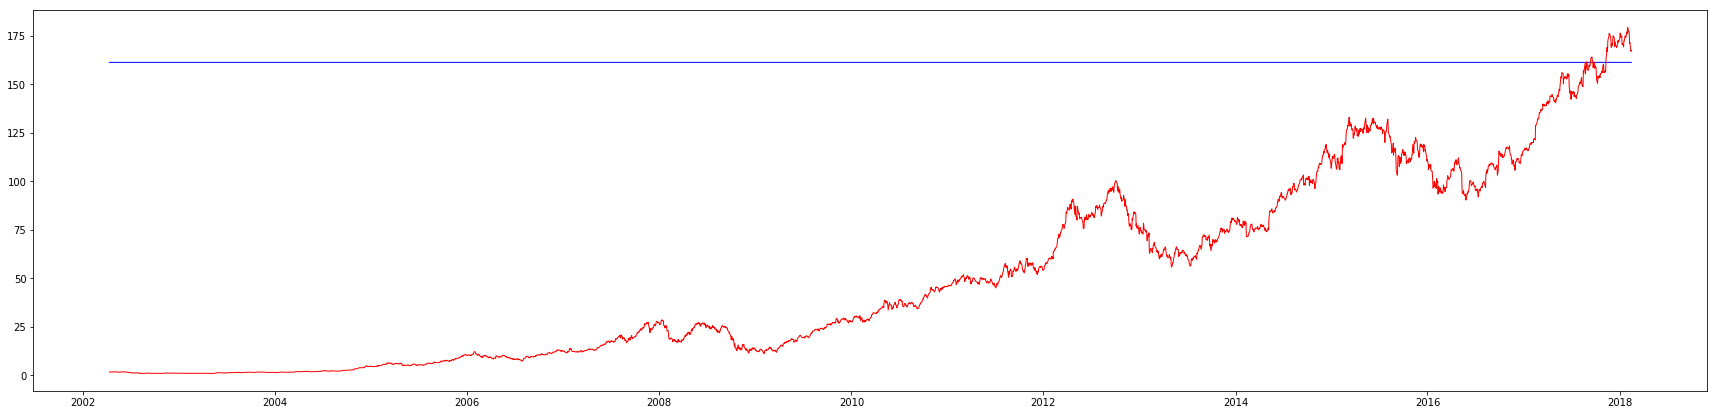

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,7))
#plt.scatter(new_dates[:num_test], y_test[:num_test], color='darkorange', label='data')
plt.plot(new_dates[:num_test],predictions[:num_test], color='blue', linewidth=1, label='Predicted')
plt.plot(new_dates[:num_test], y_test[:num_test], color='red', linewidth=1, label='Actual')

## Accuracy

In [27]:
errors = abs(predictions - y_test)
#print('Mean Absolute Error: ', round(np.mean(errors), 2), 'degrees.')


In [28]:
# Calculate Mean absolute percentage error
mape = 100 * (errors/y_test)

# Calculate & display Accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy: ', round(accuracy, 2), '%.')

Accuracy:  -2227.86 %.


## Regression Forest

In [29]:
num_test = 100
data_train = {}
data_test = {}

data_train['high_price'] = features['high_price'][:-num_test:]
data_train['low_price'] = features['low_price'][:-num_test: ]
data_train['volume'] = features['volume'][:-num_test: ]
data_train['closing_price'] = y['closing_price'][:-num_test: ]

#print(len(data_train['high_price']),len(data_train['low_price']), len(data_train['volume']), len(data_train['closing_price']))

x_train = pd.DataFrame(data_train)

y_train = y['closing_price'][:-num_test]

#print(len(y_train))


data_test['high_price'] = features['high_price'][-num_test::]
data_test['low_price'] = features['low_price'][-num_test::]
data_test['volume'] = features['volume'][-num_test::]
data_test['closing_price'] = y['closing_price'][-num_test::]

x_test = pd.DataFrame(data_test)

y_test = y['closing_price'][-num_test::]

#print(len(data_test['high_price']),len(data_test['low_price']), len(data_test['volume']), len(data_test['closing_price']))

#print(len(y_test))

#print('Train: ', len(x_train[0]), len(y_train))
# print('Test: ', len(x_test[0]), len(y_test))

In [30]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, max_depth=100, random_state=0)
regressor.fit(x_train, y_train)
predictions = regressor.predict(x_test)
# print(predictions, y_test)

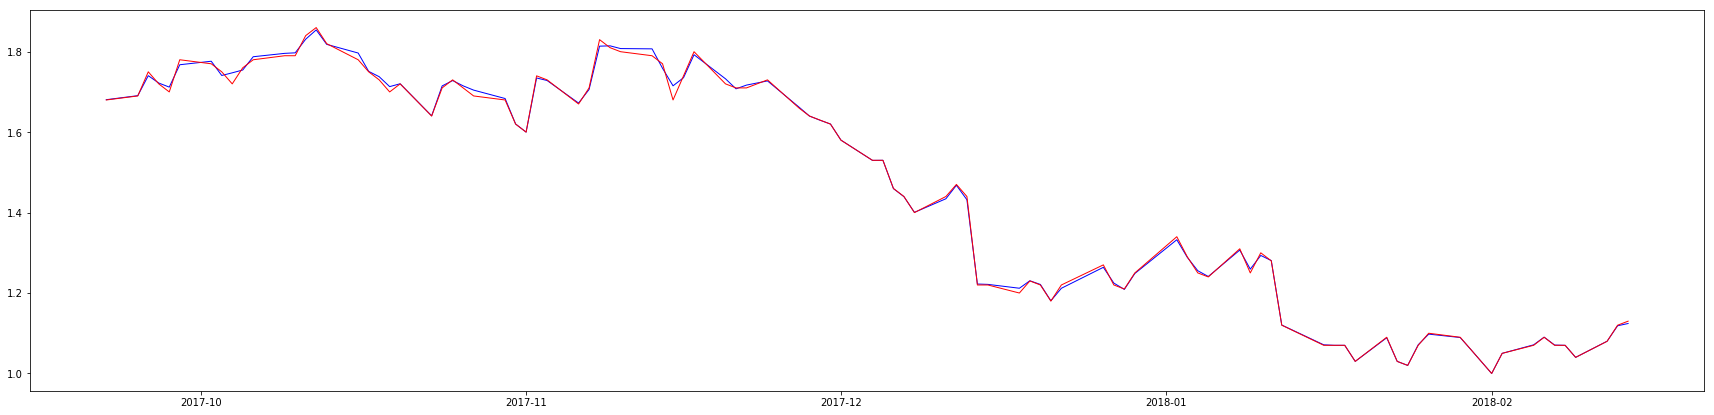

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,7))
plt.plot(new_dates[:num_test],predictions[:num_test], color='blue', linewidth=1, label='Predicted')
plt.plot(new_dates[:num_test], y_test[:num_test], color='red', linewidth=1, label='Actual')

## Accuracy

In [32]:
errors = abs (predictions - y_test)
print('Mean Absolute Error: ', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error:  0.0 degrees.


In [33]:
# Calculate Mean absolute percentage error
mape = 100 * (errors/y_test)

# Calculate & display Accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy: ', round(accuracy, 2), '%.')

Accuracy:  99.72 %.


# Decision Tree Regression

In [35]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=10)
regressor.fit(x_train, y_train)
predictions = regressor.predict(x_test)

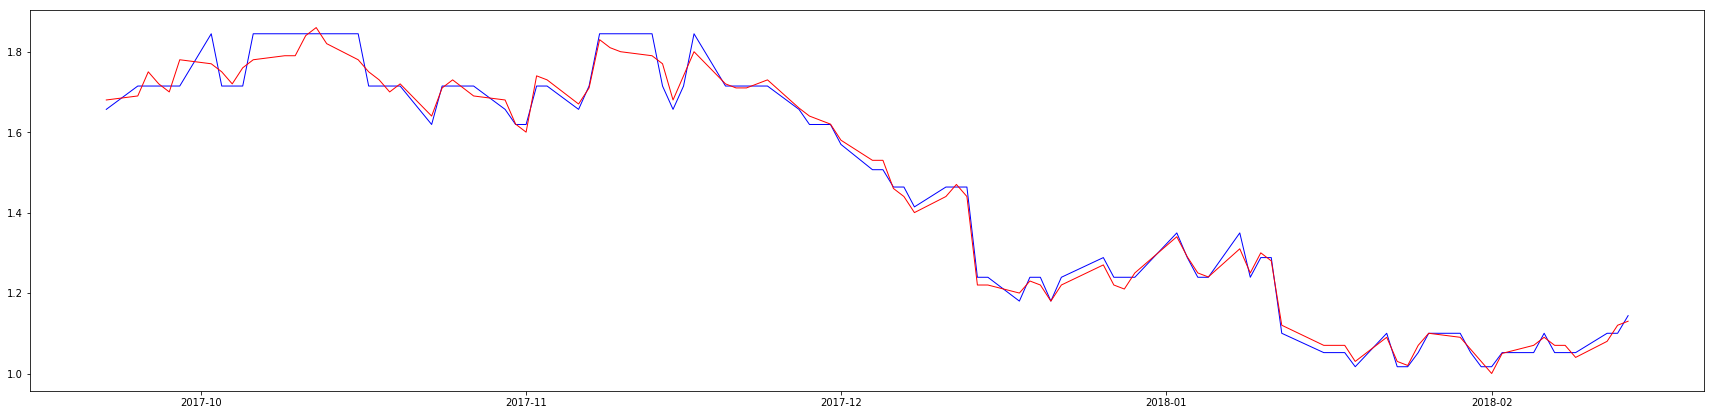

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,7))
plt.plot(new_dates[:num_test],predictions[:num_test], color='blue', linewidth=1, label='Predicted')
plt.plot(new_dates[:num_test], y_test[:num_test], color='red', linewidth=1, label='Actual')

## Accuracy

In [37]:
errors = abs (predictions - y_test)
print('Mean Absolute Error: ', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error:  0.02 degrees.


In [38]:
# Calculate Mean absolute percentage error
mape = 100 * (errors/y_test)

# Calculate & display Accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy: ', round(accuracy, 2), '%.')

Accuracy:  98.69 %.
